# Bathymetric exploration

## Links
 - Jupyter notebook tutorial https://www.dataquest.io/blog/jupyter-notebook-tutorial/
 - Shape viewer https://mapshaper.org/
 - Ontario geohub https://geohub.lio.gov.on.ca/
 - Bathymetric data https://geohub.lio.gov.on.ca/datasets/mnrf::bathymetry-line/explore?location=44.751785%2C-78.211482%2C12.12

## Hints

Start notebook
```bash
jupyter notebook
```

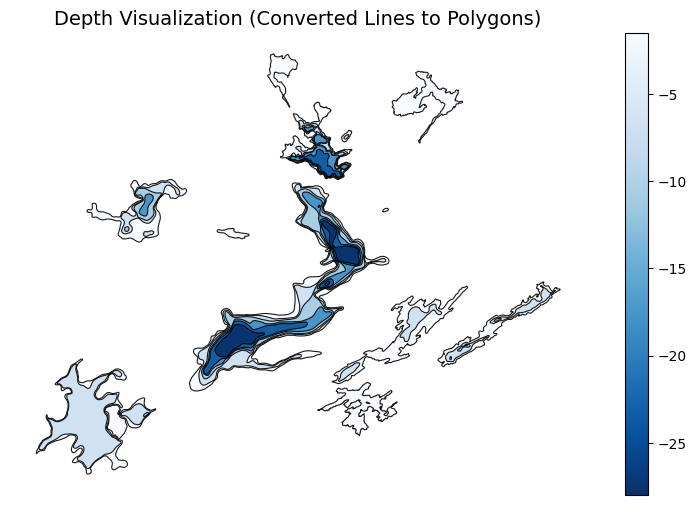

Converted 6 closed line features into polygons.


In [49]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import pandas as pd

# Load the shapefile
shapefile_path = "./data/bathy1/Bathymetry%2C_Line.shp"
gdf = gpd.read_file(shapefile_path)

# Check if "DEPTH" column exists
if "DEPTH" not in gdf.columns:
    raise ValueError("The column 'DEPTH' does not exist in the shapefile.")

# Convert "DEPTH" to numeric (in case it's stored as a string)
gdf["DEPTH"] = gdf["DEPTH"].astype(float)

# Function to convert closed LineStrings to Polygons
def line_to_polygon(geometry):
    if geometry.geom_type == "LineString" and geometry.is_ring:  # Check if closed
        return Polygon(geometry)  # Convert to polygon
    elif geometry.geom_type == "MultiLineString":
        # Try to convert MultiLineString by finding closed parts
        for line in geometry.geoms:
            if line.is_ring:
                return Polygon(line)
    return None  # Return None if it can't be converted

# Apply conversion to all geometries
gdf["geometry"] = gdf["geometry"].apply(line_to_polygon)

# Remove rows where conversion failed (i.e., non-closed lines)
gdf = gdf[gdf["geometry"].notna()]

bins = [-30, -25, -20, -15, -10, -5, 0]  # Adjust as needed
labels = ["-30", "-25", "-20", "-15", "-10", "-5"]

# Assign categories
gdf["Depth_Group"] = pd.cut(gdf["DEPTH"], bins=bins, labels=labels)

# Dissolve by depth group to merge overlapping polygons
gdf = gdf.dissolve(by="Depth_Group")

gdf = gdf.sort_values(by="DEPTH", ascending=False)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot with a depth-based color gradient
gdf.plot(column="DEPTH", cmap="Blues_r", linewidth=0.8, edgecolor='black',
         legend=True, ax=ax, alpha=0.9)

# Style adjustments
ax.set_title("Depth Visualization (Converted Lines to Polygons)", fontsize=14)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

output_svg = "./shapefile_visualization.svg"
plt.savefig(output_svg, format="svg", bbox_inches="tight")

# Show the plot
plt.show()

# Optional: Print the number of features converted
print(f"Converted {len(gdf)} closed line features into polygons.")


In [50]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import pandas as pd

# Load the shapefile
shapefile_path = "./data/bathy1/Bathymetry%2C_Line.shp"
gdf = gpd.read_file(shapefile_path)

# Check if "OGF_ID" column exists
if "OGF_ID" not in gdf.columns:
    raise ValueError("The column 'ODF_ID' does not exist in the shapefile.")

# Convert OGF_ID to numeric (if necessary)
gdf["OGF_ID"] = gdf["OGF_ID"].astype(str)  # Ensure IDs are treated as strings

# Define the list of ODF_IDs to keep
ogf_ids_to_keep = ["119860098", "119860184"]  # Ensure these match the data type

# Filter the data
filtered_gdf = gdf[gdf["OGF_ID"].isin(ogf_ids_to_keep)]

# Get unique ODF_ID values
unique_odf_ids = gdf["OGF_ID"].unique()

# Print unique values
print("Unique OGF_IDs:", unique_odf_ids)
# 17-7210-49580	
# 67,922,787
# Optional: Count the number of unique ODF_IDs
print(f"Total unique ODF_IDs: {len(unique_odf_ids)}")

Unique OGF_IDs: ['71331259' '71331261' '71331262' '71331263' '71331264' '71331266'
 '71331267' '71331268' '71331269' '71331271' '71331272' '71331273'
 '71331274' '71331275' '119859403' '119860275' '119860028' '119859371'
 '119860224' '119860110' '119860146' '119860265' '119860222' '119860227'
 '119860304' '119860299' '119860178' '119860210' '119860278' '119860072'
 '119860087' '119860107' '119860080' '119860290' '119860030' '119860284'
 '119860129' '119860125' '119860098' '119860296' '119860001' '119860166'
 '119859999' '119860118' '119860184' '119860016' '119859395' '119860331'
 '119860010' '119860143' '119860242' '119860159' '119860319' '119860315'
 '119860192' '119860093' '119860025' '119860189' '119860045' '119860236'
 '119860269' '119860239' '119860036' '119860317' '119860074' '119860248'
 '119860267' '119860122' '119859398' '119860328' '119860007' '119860112'
 '119860161' '119860164' '119860307' '119860140' '119860181' '119860152'
 '119859367' '119860217' '119860310' '119860220' 

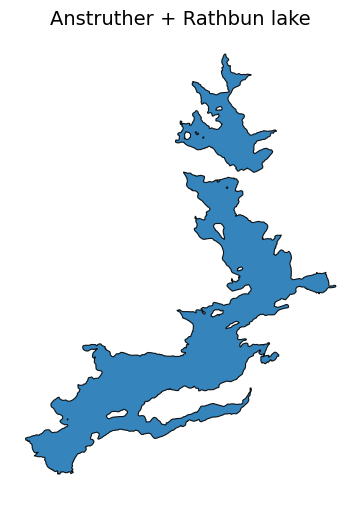

Unique OGF_IDs: ['67922787' '210230835']


In [54]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import pandas as pd

# Load the shapefile
shapefile_path = "./data/waterbody/Ontario_waterbody_location_identifier.shp"
gdf = gpd.read_file(shapefile_path)


# Convert OGF_ID to numeric (if necessary)
gdf["OGF_ID"] = gdf["OGF_ID"].astype(str)  # Ensure IDs are treated as strings

ogf_ids_to_keep = ["67922787", "210230835"]  # Ensure these match the data type

# Filter the data
gdf = gdf[gdf["OGF_ID"].isin(ogf_ids_to_keep)]

# Get unique ODF_ID values
unique_odf_ids = gdf["OGF_ID"].unique()

# 67922787 - Anstruther
# 210230835 - Rathbun

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot with a depth-based color gradient
gdf.plot( linewidth=0.8, edgecolor='black',
         legend=True, ax=ax, alpha=0.9)

# Style adjustments
ax.set_title("Anstruther + Rathbun lake", fontsize=14)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Show the plot
plt.show()


# Print unique values
print("Unique OGF_IDs:", unique_odf_ids)


In [55]:
# SVG Generator

import geopandas as gpd
import matplotlib.pyplot as plt
import os
from shapely.geometry import box, Polygon, MultiPolygon

def generate_svgs(bathy, lake, output_dir="bathy_svgs"):
    # Compute the global bounding box that will be used for all shapes
    minx, miny, maxx, maxy = lake.total_bounds
    minx = minx - 0.01
    miny = miny - 0.01
    maxx = maxx + 0.01
    maxy = maxy + 0.01
    global_bbox = box(minx, miny, maxx, maxy)  # Fixed border for all SVGs
    print(f'{minx} {miny} {maxx} {maxy}')
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Generate SVGs for each bathymetric shape
    for idx, row in bathy.iterrows():
        shape = row.geometry
        svg_filename = f"bathy_shape_{idx}.svg"
        # Create a figure and axis
        fig, ax = plt.subplots(figsize=(5, 5))

        # Plot the global bounding rectangle (same for all layers)
        gpd.GeoSeries([global_bbox]).plot(ax=ax, edgecolor="black", facecolor="none", linewidth=0.8)
        # Plot bathymetric shape
        gpd.GeoSeries([shape]).plot(ax=ax, edgecolor="black", facecolor="none", linewidth=0.8)

        # Remove axis labels/ticks
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_frame_on(False)
        
        # Position the filename inside the bounding box (bottom-right corner)
        text_x = maxx - (maxx - minx) * 0.05  # Small margin from right
        text_y = miny + (maxy - miny) * 0.05  # Small margin from bottom
        ax.text(text_x, text_y, svg_filename, fontsize=6, ha="right", va="bottom", color="black")

        # Save as SVG
        svg_path = os.path.join(output_dir, f"bathy_shape_{idx}.svg")
        plt.savefig(svg_path, format="svg", bbox_inches="tight")
        plt.close(fig)  # Close figure to free memory

        print(f"Saved: {svg_path}")
    # Generate SVGs for each bathymetric shape
    for idx, row in lake.iterrows():
        shape = row.geometry
        svg_filename = f"bathy_shape_{idx}.svg"
        # Create a figure and axis
        fig, ax = plt.subplots(figsize=(5, 5))

        # Plot the global bounding rectangle (same for all layers)
        gpd.GeoSeries([global_bbox]).plot(ax=ax, edgecolor="black", facecolor="none", linewidth=0.8)
        # Plot bathymetric shape
        gpd.GeoSeries([shape]).plot(ax=ax, edgecolor="black", facecolor="none", linewidth=0.8)

        # Remove axis labels/ticks
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_frame_on(False)
        
        # Position the filename inside the bounding box (bottom-right corner)
        text_x = maxx - (maxx - minx) * 0.05  # Small margin from right
        text_y = miny + (maxy - miny) * 0.05  # Small margin from bottom
        ax.text(text_x, text_y, svg_filename, fontsize=6, ha="right", va="bottom", color="black")

        # Save as SVG
        svg_path = os.path.join(output_dir, f"bathy_shape_{idx}.svg")
        plt.savefig(svg_path, format="svg", bbox_inches="tight")
        plt.close(fig)  # Close figure to free memory

        print(f"Saved: {svg_path}")



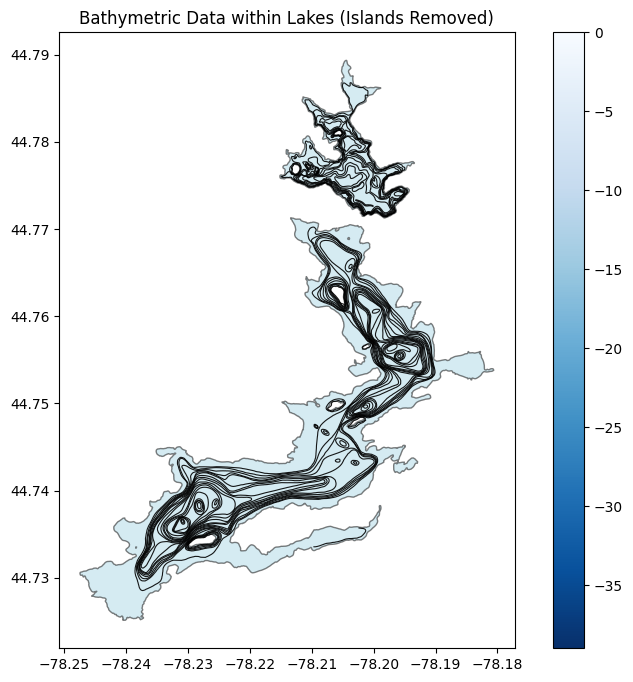

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiPolygon
import pandas as pd

# Load shapefiles
# lakes = gpd.read_file("lakes.shp")  # Lake polygons
# bathy = gpd.read_file("bathy.shp")  # Bathymetric depth data

# Ensure the same CRS
bathy = bathy.to_crs(lakes.crs)

# Extract lake boundaries (excluding islands)
def remove_islands(geom):
    if isinstance(geom, Polygon):
        return Polygon(geom.exterior)  # Keep only the outer boundary
    elif isinstance(geom, MultiPolygon):
        return MultiPolygon([Polygon(p.exterior) for p in geom.geoms])
    return geom

# Apply to all lake geometries
lakes_no_islands = lakes.copy()
lakes_no_islands["geometry"] = lakes_no_islands["geometry"].apply(remove_islands)

# Perform spatial join to get bathymetric data inside lake boundaries (excluding islands)
bathy_filtered = gpd.sjoin(bathy, lakes_no_islands, predicate="within")

# Plot the result
fig, ax = plt.subplots(figsize=(10, 8))
lakes.plot(ax=ax, color="lightblue", edgecolor="black", alpha=0.5)  # Original lakes with islands
bathy_filtered.plot(column="DEPTH", cmap="Blues_r", linewidth=0.8, edgecolor='black', legend=True, ax=ax, alpha=0.9)  # Bathymetric data without islands

plt.title("Bathymetric Data within Lakes (Islands Removed)")
plt.show()


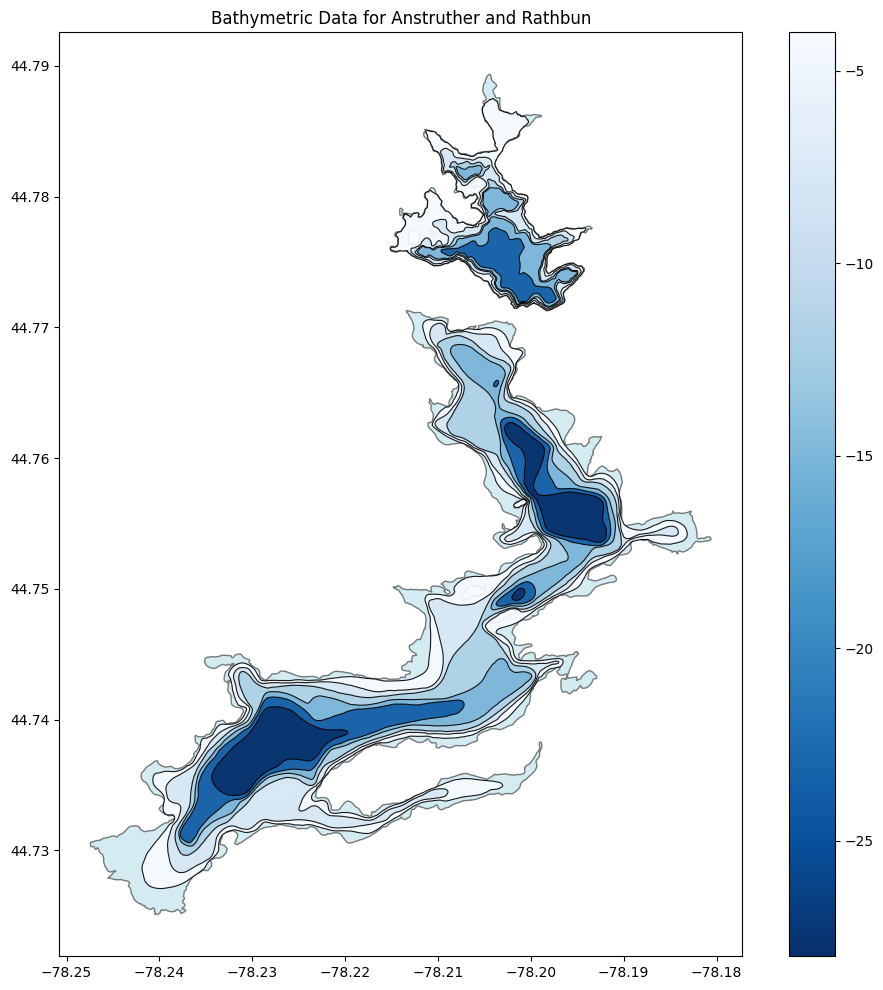

In [32]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import pandas as pd

# Load shapefiles
lakes = gpd.read_file("./data/waterbody/Ontario_waterbody_location_identifier.shp")  # Lake polygons
bathy = gpd.read_file("./data/bathy1/Bathymetry%2C_Line.shp")  # Bathymetric depth data

# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
bathy = bathy.to_crs(lakes.crs)

lakes["OGF_ID"] = lakes["OGF_ID"].astype(str)  # Ensure IDs are treated as strings

ogf_ids_to_keep = ["67922787", "210230835"]  # Ensure these match the data type

# Filter the data
lakes = lakes[lakes["OGF_ID"].isin(ogf_ids_to_keep)]

# Perform a spatial join to filter bathy data within lakes
bathy_filtered = gpd.sjoin(bathy, lakes, predicate="intersects")

# Convert "DEPTH" to numeric (in case it's stored as a string)
bathy_filtered["DEPTH"] = bathy_filtered["DEPTH"].astype(float)

# Function to convert closed LineStrings to Polygons
def line_to_polygon(geometry):
    if geometry.geom_type == "LineString" and geometry.is_ring:  # Check if closed
        return Polygon(geometry)  # Convert to polygon
    elif geometry.geom_type == "MultiLineString":
        # Try to convert MultiLineString by finding closed parts
        for line in geometry.geoms:
            if line.is_ring:
                return Polygon(line)
    return None  # Return None if it can't be converted

# Apply conversion to all geometries
bathy_filtered["geometry"] = bathy_filtered["geometry"].apply(line_to_polygon)

# Remove rows where conversion failed (i.e., non-closed lines)
bathy_filtered = bathy_filtered[bathy_filtered["geometry"].notna()]

bins = [-30, -25, -20, -15, -10, -5, 0]  # Adjust as needed
labels = ["-30", "-25", "-20", "-15", "-10", "-5"]

# Assign categories
bathy_filtered["Depth_Group"] = pd.cut(bathy_filtered["DEPTH"], bins=bins, labels=labels)

# Dissolve by depth group to merge overlapping polygons
bathy_filtered = bathy_filtered.dissolve(by="Depth_Group")

bathy_filtered = bathy_filtered.sort_values(by="DEPTH", ascending=False)

# Extract lake boundaries (excluding islands)
def remove_islands(geom):
    if isinstance(geom, Polygon):
        return Polygon(geom.exterior)  # Keep only the outer boundary
    elif isinstance(geom, MultiPolygon):
        return MultiPolygon([Polygon(p.exterior) for p in geom.geoms])
    return geom

# Apply to all lake geometries
lakes_no_islands = lakes.copy()
lakes_no_islands["geometry"] = lakes_no_islands["geometry"].apply(remove_islands)

# Perform spatial join to get bathymetric data inside lake boundaries (excluding islands)
bathy_copy = bathy_filtered.copy()
bathy_copy = bathy_copy.drop(['index_right'], axis=1)
# bathy_filtered = gpd.sjoin(bathy_copy, lakes_no_islands, predicate="within")


# Plot the result
fig, ax = plt.subplots(figsize=(12, 12))
lakes.plot(ax=ax, color="lightblue", edgecolor="black", alpha=0.5)  # Plot lakes
bathy_filtered.plot(column="DEPTH", cmap="Blues_r", linewidth=0.8, edgecolor='black', legend=True, ax=ax, alpha=0.9)

plt.title("Bathymetric Data for Anstruther and Rathbun")

output_svg = "./data/bathy_filtered.svg"
plt.savefig(output_svg, format="svg", bbox_inches="tight")

plt.show()



-78.25744189999996 44.71511510000004 -78.17057769999995 44.799349600000035
Saved: bathy_svgs/bathy_shape_-5.svg
Saved: bathy_svgs/bathy_shape_-10.svg
Saved: bathy_svgs/bathy_shape_-15.svg
Saved: bathy_svgs/bathy_shape_-20.svg
Saved: bathy_svgs/bathy_shape_-25.svg
Saved: bathy_svgs/bathy_shape_-30.svg
Saved: bathy_svgs/bathy_shape_13.svg
Saved: bathy_svgs/bathy_shape_17.svg


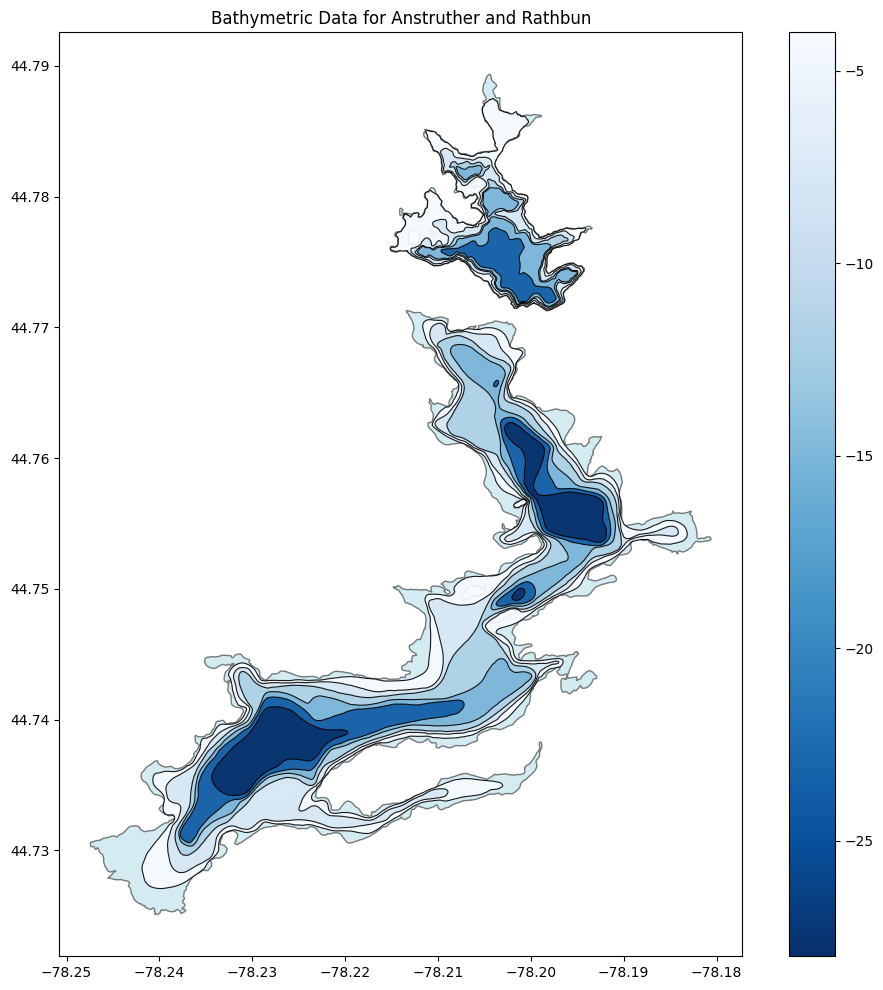

In [56]:
# Final copy!

import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import pandas as pd

# Load shapefiles
lakes = gpd.read_file("./data/waterbody/Ontario_waterbody_location_identifier.shp")  # Lake polygons
bathy = gpd.read_file("./data/bathy1/Bathymetry%2C_Line.shp")  # Bathymetric depth data

# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
bathy = bathy.to_crs(lakes.crs)

lakes["OGF_ID"] = lakes["OGF_ID"].astype(str)  # Ensure IDs are treated as strings

ogf_ids_to_keep = ["67922787", "210230835"]  # Ensure these match the data type

# Filter the data
lakes = lakes[lakes["OGF_ID"].isin(ogf_ids_to_keep)]

# Perform a spatial join to filter bathy data within lakes
bathy_filtered = gpd.sjoin(bathy, lakes, predicate="intersects")


# Convert "DEPTH" to numeric (in case it's stored as a string)
bathy_filtered["DEPTH"] = bathy_filtered["DEPTH"].astype(float)

# Function to convert closed LineStrings to Polygons
def line_to_polygon(geometry):
    if geometry.geom_type == "LineString" and geometry.is_ring:  # Check if closed
        return Polygon(geometry)  # Convert to polygon
    elif geometry.geom_type == "MultiLineString":
        # Try to convert MultiLineString by finding closed parts
        for line in geometry.geoms:
            if line.is_ring:
                return Polygon(line)
    return None  # Return None if it can't be converted

# Apply conversion to all geometries
bathy_filtered["geometry"] = bathy_filtered["geometry"].apply(line_to_polygon)

# Remove rows where conversion failed (i.e., non-closed lines)
bathy_filtered = bathy_filtered[bathy_filtered["geometry"].notna()]

bins = [-30, -25, -20, -15, -10, -5, 0]  # Adjust as needed
labels = ["-30", "-25", "-20", "-15", "-10", "-5"]

# Assign categories
bathy_filtered["Depth_Group"] = pd.cut(bathy_filtered["DEPTH"], bins=bins, labels=labels)

# Dissolve by depth group to merge overlapping polygons
bathy_filtered = bathy_filtered.dissolve(by="Depth_Group")

bathy_filtered = bathy_filtered.sort_values(by="DEPTH", ascending=False)

# Plot the result
fig, ax = plt.subplots(figsize=(12, 12))
lakes.plot(ax=ax, color="lightblue", edgecolor="black", alpha=0.5)  # Plot lakes
bathy_filtered.plot(column="DEPTH", cmap="Blues_r", linewidth=0.8, edgecolor='black', legend=True, ax=ax, alpha=0.9)

# svg_data = gpd.sjoin(lakes, bathy_filtered, predicate="within")
generate_svgs(bathy_filtered, lakes)
plt.title("Bathymetric Data for Anstruther and Rathbun")

output_svg = "./data/bathy_filtered.svg"
plt.savefig(output_svg, format="svg", bbox_inches="tight")

plt.show()

